# Phi-inspired analysis on Amyloid beta

## Using FoldX results on the following Ab structures:
- 2beg
- 2mxu
- 2nao [3-mer]
- 5kk3
- 5oqv
- 7q4b
- 7q4m
- 8ezd
- 8eze

### Calculating ddEa/ddG ratio values:
- using the following thresholds for ddG filtering: 10 kcal/mol > |ddG| > 0.6 kcal/mol 

AND 

- ddEa values (in kcal/mol) derived from MoCHI additive terms using scaling factor of 0.233

08.07.2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import scipy

# for plotting
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

In [3]:
%%bash

pip freeze

archspec @ file:///croot/archspec_1697725767277/work
arcplot==0.1.4
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1698341106958/work
biopython==1.83
boltons @ file:///work/ci_py311/boltons_1677685195580/work
Brotli @ file:///work/ci_py311/brotli-split_1676830125088/work
certifi @ file:///home/conda/feedstock_root/build_artifacts/certifi_1707022139797/work/certifi
cffi @ file:///croot/cffi_1700254295673/work
charset-normalizer @ file:///tmp/build/80754af9/charset-normalizer_1630003229654/work
comm @ file:///home/conda/feedstock_root/build_artifacts/comm_1710320294760/work
conda-content-trust @ file:///croot/conda-content-trust_1693490622020/work
conda-package-handling @ file:///croot/conda-package-handling_1690999929514/work
conda_package_streaming @ file:///croot/conda-package-streaming_1690987966409/work
contourpy==1.2.0
cryptography @ file:///croot/cryptography_1702070282333/work
cycler==0.12.1
debugpy @ file:///croot/debugpy_1690905042057/work
decorator @ f

# Read in first order terms from MoCHI model trained on double mutant datasets

In [4]:
# going on to calculate phi values using ddEa from doubles run with all 3 datasets, Sigmoid fit

mochi_dir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/amyloids_energy_modelling/Double_mutants_analysis/all_vars_analysis/mochi_results/'



In [5]:
# here will look only at runs with all 3 doubles datasets
# Sigmoid fit

curr_path = mochi_dir + '20240219_max_terms_order_1_Sigmoid_l2_regularization_factor_1e-05_all_3_doubles_datasets_all_variants'       

weights_Nucleation = pd.read_csv(curr_path + '/weights/weights_Nucleation.txt',
                                sep='\t')


In [6]:
weights_Nucleation

,id,id_ref,Pos,Pos_ref,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10,n,mean,std,ci95,trait_name,mean_kcal/mol,std_kcal/mol,ci95_kcal/mol
0,WT,WT,NaN,NaN,0.371381,0.391369,0.357266,0.348474,0.372521,0.341733,0.358259,0.353224,0.374944,0.356986,10,0.362616,0.014747,0.057808,Nucleation,0.218317,0.008879,0.034804
1,D1*,D1*,1.0,1.0,-2.213683,-2.545237,-2.185623,-2.583970,-2.320398,-2.029718,-2.038322,-2.851886,-2.372507,-2.080908,10,-2.322225,0.270011,1.058444,Nucleation,-1.398121,0.162563,0.637248
2,D1A,D1A,1.0,1.0,0.047495,0.067011,0.077061,0.008786,0.037928,0.066478,0.067405,0.073109,0.027157,0.099418,10,0.057185,0.026726,0.104765,Nucleation,0.034429,0.016091,0.063075
3,D1C,D1C,1.0,1.0,0.020790,-0.018463,0.064381,0.025494,0.063339,0.093359,0.062324,0.084942,0.114450,0.044598,10,0.055521,0.038954,0.152699,Nucleation,0.033427,0.023453,0.091934
4,D1E,D1E,1.0,1.0,-0.053183,-0.059048,-0.048736,-0.055957,-0.051849,-0.058691,-0.070539,-0.051149,-0.047641,-0.064017,10,-0.056081,0.007176,0.028130,Nucleation,-0.033764,0.004320,0.016936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,A42T,A42T,42.0,42.0,0.145117,0.149020,0.219678,0.186265,0.082041,0.077438,0.125795,0.167661,0.201935,0.257585,10,0.161254,0.057718,0.226253,Nucleation,0.097084,0.034749,0.136218
837,A42V,A42V,42.0,42.0,0.229532,0.334067,0.283984,0.229813,0.256938,0.260202,0.229795,0.320931,0.256699,0.279617,10,0.268158,0.036916,0.144711,Nucleation,0.161447,0.022226,0.087125
838,A42W,A42W,42.0,42.0,-1.611651,-1.768430,-1.426433,-1.168376,-1.707580,-1.035545,-1.801229,-1.726302,-1.276101,-1.233302,10,-1.475495,0.282040,1.105598,Nucleation,-0.888338,0.169805,0.665637
839,A42Y,A42Y,42.0,42.0,-0.916438,-0.897971,-1.026022,-1.039680,-1.146212,-0.833155,-0.995114,-0.729666,-1.002822,-0.952950,10,-0.954003,0.116918,0.458318,Nucleation,-0.574368,0.070392,0.275936


In [7]:
# add ddEa, bc weights_Nucleation['mean_kcal/mol'] is -ddEa
weights_Nucleation['ddEa'] = - weights_Nucleation['mean_kcal/mol']

# scale ddEa to be in kcal/mol
weights_Nucleation['ddEa_scaled'] = (weights_Nucleation['ddEa'])/0.233

In [8]:
# visualise these

In [9]:
# table of all possible 20 aa in all possible Ab (42) positions

AB_WT = "DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA"
all_aa = ["G","A","V","L","M","I","F","Y","W","K","R","D","E","S","T","C","N","Q","H", "P", "*"]


ddE_df_mean_kcalmol = pd.DataFrame(columns=[elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))], 
                                                           index = list(all_aa))

In [10]:
ddE_df_mean_kcalmol.head()

,D-1,A-2,E-3,F-4,R-5,H-6,D-7,S-8,G-9,Y-10,E-11,V-12,H-13,H-14,Q-15,K-16,L-17,V-18,F-19,F-20,A-21,E-22,D-23,V-24,G-25,S-26,N-27,K-28,G-29,A-30,I-31,I-32,G-33,L-34,M-35,V-36,G-37,G-38,V-39,V-40,I-41,A-42
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# populate the ddE_df table according to weights_Nucleation

for idx in list(weights_Nucleation.index):

    curr_mutation_id = weights_Nucleation.loc[idx,'id']

    # continue if not WT
    if curr_mutation_id != 'WT':
        # position (1-42) of mutation in Ab sequence
        curr_mutation_pos = curr_mutation_id[1:-1]
        # aa introduced by the mutation
        curr_new_aa = curr_mutation_id[-1]

        # inferred value of ddEa to be added
        curr_ddEa_value = weights_Nucleation.loc[idx,'ddEa_scaled']

        # minus because we have -ddEa predicted
        ddE_df_mean_kcalmol.loc[curr_new_aa, list(ddE_df_mean_kcalmol.columns)[int(curr_mutation_pos) - 1]] = curr_ddEa_value


In [12]:
# make sure values are float
for col in list(ddE_df_mean_kcalmol.columns):
    ddE_df_mean_kcalmol[col] = ddE_df_mean_kcalmol[col].astype(float)


In [13]:
mask_ddE = ddE_df_mean_kcalmol.isnull()

cmap_ddE = matplotlib.colormaps.get('RdBu_r')
cmap_ddE.set_bad("lightgrey")

In [14]:
ddE_df_mean_kcalmol

,D-1,A-2,E-3,F-4,R-5,H-6,D-7,S-8,G-9,Y-10,E-11,V-12,H-13,H-14,Q-15,K-16,L-17,V-18,F-19,F-20,A-21,E-22,D-23,V-24,G-25,S-26,N-27,K-28,G-29,A-30,I-31,I-32,G-33,L-34,M-35,V-36,G-37,G-38,V-39,V-40,I-41,A-42
G,-0.513740,0.257202,-0.524391,0.666902,1.172574,0.538170,-0.379760,0.049165,NaN,-0.152985,-0.731357,-0.198954,1.312383,-0.346138,0.684108,0.969702,0.015516,0.895140,1.362861,-0.505378,0.022248,-3.826271,-1.212725,-0.904030,NaN,0.509752,4.017171,1.468948,NaN,0.102581,2.799195,7.263138,NaN,5.986507,5.676245,4.148929,NaN,NaN,7.653882,5.714533,6.609346,2.607290
A,-0.147763,NaN,-0.309471,0.506991,1.287016,0.702866,-0.002935,0.284632,0.207127,-0.004661,-0.176241,0.048477,1.447723,0.087862,-0.751414,1.798536,0.781197,1.482053,2.341384,1.885418,NaN,-1.411756,1.809402,0.287833,1.048225,0.809324,1.675232,0.669499,2.072439,NaN,3.230944,6.023018,4.130022,3.021727,5.139845,2.753544,4.544543,4.662272,4.888832,5.341470,6.636207,NaN
V,1.982111,1.855294,1.460877,0.918588,1.157460,1.221586,0.994238,0.771720,0.443632,0.402577,-0.056266,NaN,-0.331792,-1.477809,-2.047214,1.404426,-1.147878,NaN,-0.631322,0.018835,-0.975088,0.032794,4.207460,NaN,0.527245,-0.969136,-0.374104,1.253967,-1.462399,-2.846278,1.177204,2.554783,4.915985,-0.736443,2.057580,NaN,5.517632,4.814599,NaN,NaN,3.502116,-0.692907
L,2.752797,2.418817,2.271359,1.141775,1.614956,1.857726,1.097659,0.690486,1.289209,1.344692,2.522108,0.908868,1.535120,0.298253,0.145906,3.311386,NaN,1.768836,0.339803,0.673428,-1.108597,1.926937,5.088694,0.710624,2.068150,0.287842,1.520321,5.077148,1.871838,-1.077650,3.874490,5.801199,4.021306,NaN,4.457238,-0.312345,9.256260,7.166352,2.478533,3.498711,2.456996,-2.662287
M,0.842132,1.169468,0.299724,0.630338,1.108589,0.808810,0.214325,0.265724,0.507249,0.897652,2.043918,0.394607,0.521359,1.365052,0.544794,2.613689,-0.140666,0.665005,-0.433236,0.532922,-0.648418,1.101786,4.784795,-0.188058,1.227797,0.923965,0.014516,4.132712,1.904589,0.868127,2.012131,7.167714,1.389000,0.231609,NaN,0.241387,8.272791,5.801625,2.405861,3.846833,2.855504,-2.056350
I,2.590310,2.172209,1.549483,0.781311,1.236310,1.819976,1.013811,1.108447,0.498474,0.629187,-0.226308,0.332357,-0.674893,-1.589531,-1.769024,2.947738,-1.240891,0.291136,-1.441313,-0.908563,-2.217124,1.892251,5.440443,-0.789274,0.480480,0.279752,-0.225430,2.334893,-1.139611,-2.405649,NaN,NaN,5.880424,-1.333675,3.044939,-0.821111,7.874150,5.849606,-0.153560,1.797520,NaN,-0.699159
F,0.480155,0.128483,-0.251483,NaN,1.393774,0.853974,0.292976,0.276359,-0.183608,0.121737,0.463623,0.564148,0.125694,1.129190,0.755955,4.136642,-0.922876,-0.128004,NaN,NaN,-1.904030,2.646883,5.369181,0.952631,0.605252,2.003754,-1.893347,2.675049,1.983139,0.675200,2.396958,5.450186,3.660147,1.174189,6.458651,0.252573,8.604114,6.365029,3.472572,2.487587,-0.379039,-0.178046
Y,0.413142,0.286494,-0.306889,0.345169,1.466453,0.835888,0.280575,0.187702,-0.715327,NaN,-0.303270,1.011900,-0.173286,1.082909,2.114961,0.528699,-0.869949,-0.496378,0.946352,0.321197,0.666304,1.359203,4.611818,1.574505,0.792204,1.654842,-0.308158,0.852350,2.392573,5.074197,2.385774,5.761123,3.385179,2.567611,4.677266,0.760311,7.686005,7.095736,3.656119,1.228842,0.600879,2.465099
W,0.922289,0.200349,-0.720210,0.783091,1.428499,0.593596,0.121613,0.091317,0.421011,0.730887,1.306681,0.272612,2.082526,3.753827,5.590954,4.534396,-0.170097,1.351971,2.624259,3.328000,2.529459,5.852244,6.000243,3.053724,2.693318,3.707204,1.829912,4.654491,4.571558,5.315117,4.128280,7.820627,6.268929,4.903888,5.398989,5.417723,8.997745,8.403956,6.797007,6.457193,2.663495,3.812609
K,0.189033,0.366360,-0.134040,0.965446,0.359003,0.588470,-0.033936,0.370751,-0.074992,0.295757,0.285100,0.106020,0.635573,0.726993,1.492122,NaN,-0.460467,0.812020,0.633180,-0.133781,1.628114,-0.615304,0.161534,-0.033169,-0.179615,2.540121,4.736361,NaN,2.893628,3.943967,2.478976,6.781221,2.146400,2.764652,6.952580,3.058778,9.440661,2.968813,4.141772,6.916764,4.723069,4.234715


Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

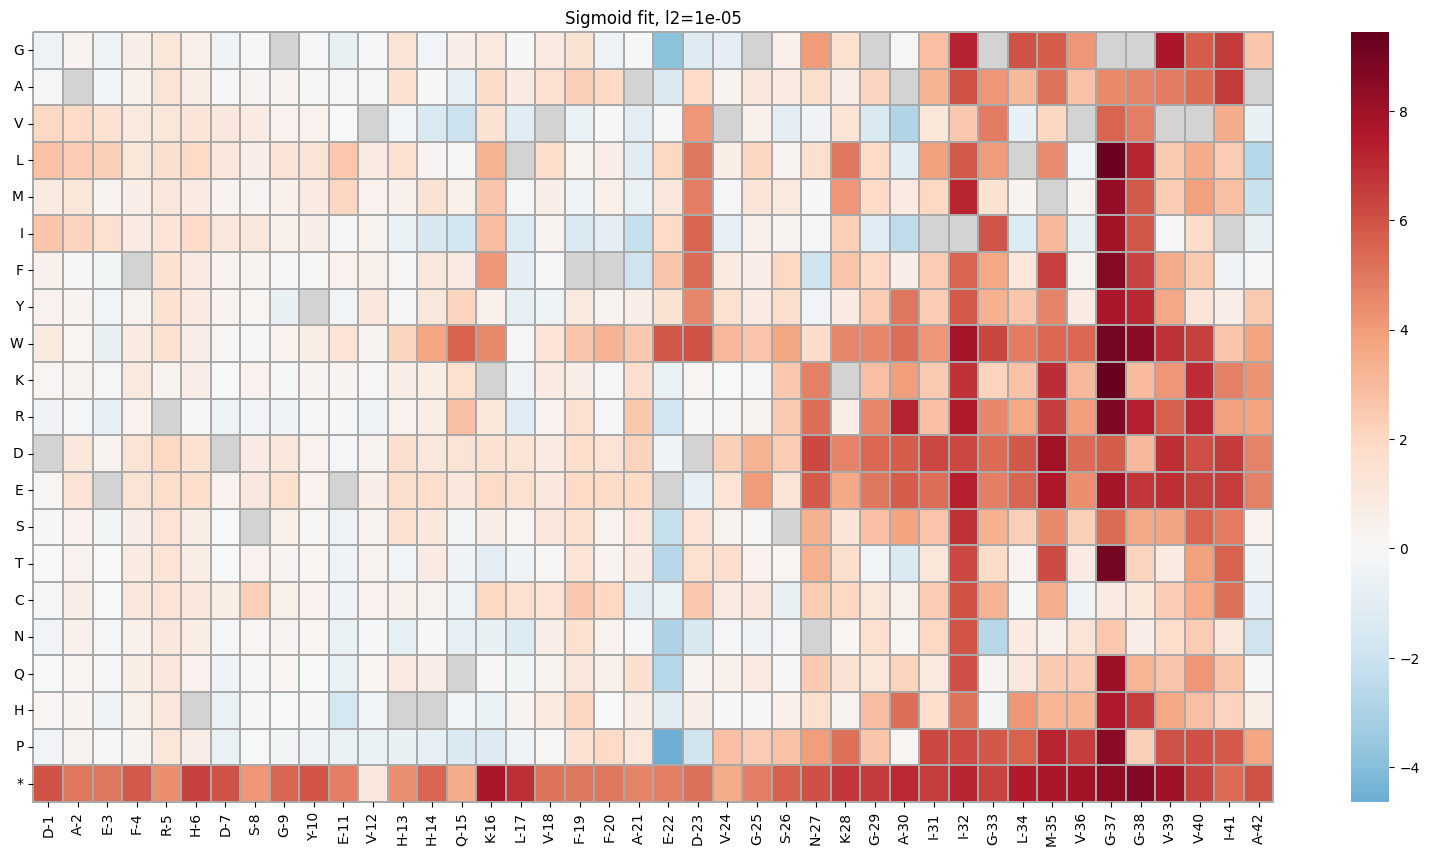

In [15]:
fig = plt.figure(figsize=(20, 10))
sns.heatmap(ddE_df_mean_kcalmol, cmap=cmap_ddE, 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=mask_ddE,
            linewidths=0.005, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('Sigmoid fit, l2=1e-05')

#plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
#           bbox_inches = 'tight')

In [16]:
weights_Nucleation.columns

Index(['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol', 'ddEa', 'ddEa_scaled'],
      dtype='object')

## Load in FoldX results (ddG effect of mutations in firbil state) on the following structures of Ab42:

- 2beg
- 2mxu
- 2nao [3-mer]
- 5kk3
- 5oqv
- 8ezd
- 8eze

In [20]:
# files with ddGs inferred by FoldX

# structures
foldX_runs = ['2beg','2mxu',
              '2nao', # 3-mer
              '5kk3','5oqv',
              '7q4b','7q4m',
              '8ezd','8eze'
              
             ]
workdir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/amyloids_energy_modelling/Phi_analysis/Single_4_stack_filament_analysis/'

difs = {}
difs_average = {}

rows2skip = [i for i in range(8)]

# to generate the files below, went and duplicated the original (Dif of Average) files out of FoldX
# and manually deleted the first few lines that are unreadable for pandas
for run in ['2beg','2mxu',
              '2nao', # 3-mer
              '5kk3','5oqv',
            '8ezd','8eze']:
    
    print(run)
    
    curr_path = workdir + run + '/20240325_run_foldx5_all_possible_Ab_mutations_' + run + '/'
    
    #print(curr_path)
    
    if run == '2nao':
        difs[run] = pd.read_csv(curr_path + 'Dif_' + run + '_3_stack_Repair.fxout',
                           sep = '\t', skiprows=rows2skip)
        difs_average[run] = pd.read_csv(curr_path + 'Average_' + run + '_3_stack_Repair.fxout',
                           sep = '\t', skiprows=rows2skip)
        
    else:
        
        difs[run] = pd.read_csv(curr_path + 'Dif_' + run + '_4_stack_Repair.fxout',
                               sep = '\t', skiprows=rows2skip)
        difs_average[run] = pd.read_csv(curr_path + 'Average_' + run + '_4_stack_Repair.fxout',
                               sep = '\t', skiprows=rows2skip)

        
for run in ['7q4b','7q4m']:
    print(run)
    curr_path = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/amyloids_energy_modelling/Phi_analysis/Single_4_stack_filament_analysis/' + run + '/20240226_run_foldx5_all_possible_Ab_mutations_' + run + '/'
    
    difs[run] = pd.read_csv(curr_path + 'Dif_' + run + '_4_stack_Repair.fxout',
                               sep = '\t', skiprows=rows2skip)
    difs_average[run] = pd.read_csv(curr_path + 'Average_' + run + '_4_stack_Repair.fxout',
                               sep = '\t', skiprows=rows2skip)

2beg
2mxu
2nao
5kk3
5oqv
8ezd
8eze
7q4b
7q4m


In [21]:
# generating a list of all possible mutations for 7q4b and 7q4m

AB_WT = 'DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA'

all_aa = ['G','A','V','L','M','I','F','Y','W','K','R','D','E','S','T','C','N','Q','H','P']

# mutations introduced
mutations = {}
mutations['2beg'] = []
mutations['2mxu'] = []
mutations['2nao'] = []
mutations['5kk3'] = []
mutations['5oqv'] = []
mutations['7q4b'] = []
mutations['7q4m'] = []
mutations['8ezd'] = []
mutations['8eze'] = []

# positions for which structural information is available
pos_available = {}
pos_available['2beg'] = [i for i in range(16,42)] # from pos 17 to 42, here enumerated from 0
pos_available['2mxu'] = [i for i in range(10,42)] # from pos 11 to 42, here enumerated from 0
pos_available['2nao'] = [i for i in range(0,42)] # from pos 1 to 42, here enumerated from 0
pos_available['5kk3'] = [i for i in range(10,42)] # from pos 11 to 42, here enumerated from 0
pos_available['5oqv'] = [i for i in range(0,42)] # from pos 1 to 42, here enumerated from 0
pos_available['7q4b'] = [i for i in range(8,42)] # from pos 9 to 42, here enumerated from 0
pos_available['7q4m'] = [i for i in range(11,42)] # from pos 12 to 42, here enumerated from 0
pos_available['8ezd'] = [i for i in range(11,42)] # from pos 12 to 42, here enumerated from 0
pos_available['8eze'] = [i for i in range(0,42)] # from pos 1 to 42, here enumerated from 0



for run in foldX_runs:
    print(run)
    
    for pos in pos_available[run]:
        curr_Ab_wt_aa = AB_WT[pos]
        curr_prefix = curr_Ab_wt_aa + str(pos+1)
        for aa in all_aa:
            if curr_Ab_wt_aa != aa:
                mutations[run].append(curr_prefix + aa)

2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


In [30]:
# get to per monomer ddG values

for run in foldX_runs:
    difs[run]['mutation'] = mutations[run]    
    difs[run]['mutated_pos'] = [mutation[0] + '-' + mutation[1:-1] for mutation in list(difs[run]['mutation'])]
    difs[run]['new_aa'] = [mutation[-1] for mutation in list(difs[run]['mutation'])]
    
    
    if run == '2nao':
        difs[run]['ddG_per_monomer'] = difs[run]['total energy'] / 3
    else:
        # IMPORTANT: divide by 4 to obtain per monomer scores in kcal/mol (FoldX output is in kcal/mol)
        difs[run]['ddG_per_monomer'] = difs[run]['total energy'] / 4

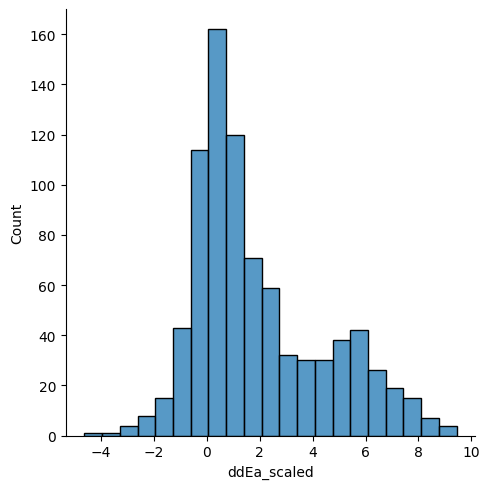

In [32]:
sns.displot(weights_Nucleation['ddEa_scaled'])

## Plot ddG heatmaps

In [36]:
# arranged Ab positions

Ab_positions = {}

for run in foldX_runs:
    print(run)
    
    curr_part_of_AB_WT = AB_WT[pos_available[run][0]:pos_available[run][-1]+1]
    
    #print('last pos here', pos_available[run][-1])
    #print('curr_part_of_AB_WT', curr_part_of_AB_WT)
    
    Ab_positions[run] = [AB_WT_aa + '-' + str(pos+1) for AB_WT_aa,pos in zip(curr_part_of_AB_WT, pos_available[run])]

2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


In [37]:
dfs_to_plot = {}

for run in foldX_runs:
    dfs_to_plot[run] = pd.DataFrame(index = all_aa, columns = Ab_positions[run])
    
    for new_aa in list(dfs_to_plot[run].index):
        #print(new_aa)
        for mutated_pos in list(dfs_to_plot[run].columns):
            #print(mutated_pos)
            curr_dif_subset = difs[run][(difs[run]['mutated_pos'] == mutated_pos) & (difs[run]['new_aa'] == new_aa)]
            
            #print(curr_dif_subset['total energy'])
            if len(curr_dif_subset) > 0:
                dfs_to_plot[run].loc[new_aa,mutated_pos] = float(list(curr_dif_subset['ddG_per_monomer'])[0])
            #else:
                #dfs_to_plot[run].loc[new_aa,mutated_pos] = np.nan
                
    dfs_to_plot[run] = dfs_to_plot[run].astype(float)

In [38]:
cmaps_ddG = {}
masks_ddG = {}

for run in foldX_runs:
    masks_ddG[run] = dfs_to_plot[run].isnull()

    cmaps_ddG[run] = matplotlib.colormaps.get('RdBu_r')
    cmaps_ddG[run].set_bad("lightgrey")

In [39]:
foldX_runs

['2beg', '2mxu', '2nao', '5kk3', '5oqv', '7q4b', '7q4m', '8ezd', '8eze']

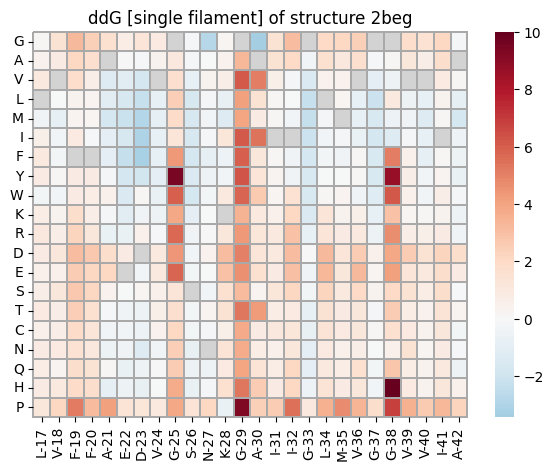

In [42]:
run = '2beg'
fig = plt.figure(figsize=(7, 5))
sns.heatmap(dfs_to_plot[run], cmap=cmaps_ddG[run], 
            #vmin = np.quantile(values[run], 0.05),
            vmax = 10,
            mask=masks_ddG[run],
            linewidths=0.1, linecolor='darkgrey', clip_on=False,
            center=0
           )
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('ddG [single filament] of structure ' + run)

plt.savefig('./figures/20240507_ddG_predictions_single_filament_structure_' + run + '.pdf',
           bbox_inches = 'tight')

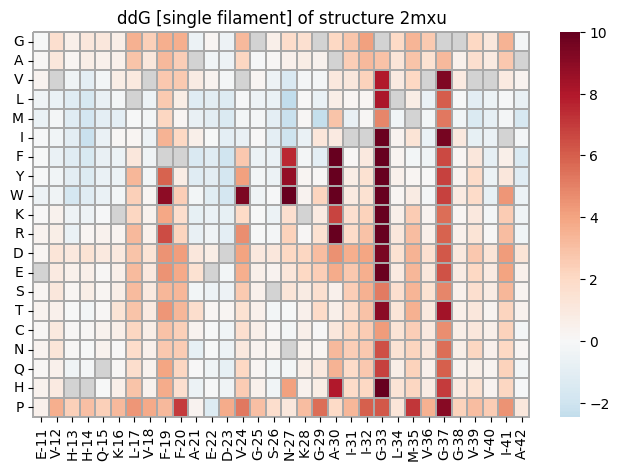

In [43]:
run = '2mxu'
fig = plt.figure(figsize=(8, 5))
sns.heatmap(dfs_to_plot[run], cmap=cmaps_ddG[run], 
            #vmin = np.quantile(values[run], 0.05),
            vmax = 10,
            mask=masks_ddG[run],
            linewidths=0.1, linecolor='darkgrey', clip_on=False,
            center=0
           )
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('ddG [single filament] of structure ' + run)

plt.savefig('./figures/20240507_ddG_predictions_single_filament_structure_' + run + '.pdf',
           bbox_inches = 'tight')

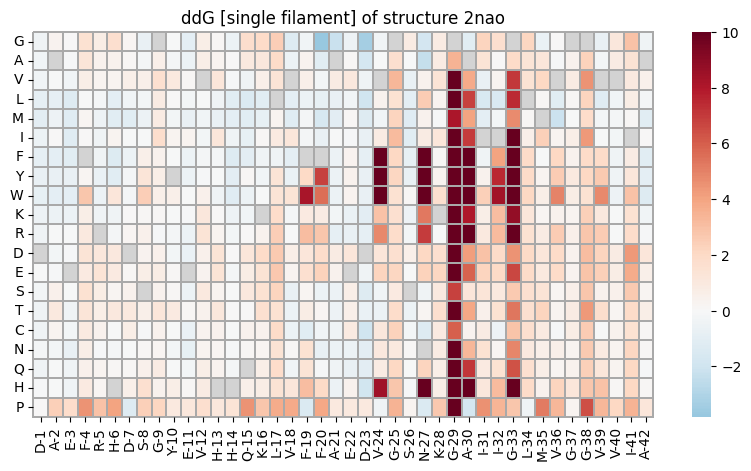

In [65]:
run = '2nao'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(dfs_to_plot[run], cmap=cmaps_ddG[run], 
            #vmin = np.quantile(values[run], 0.05),
            vmax = 10,
            mask=masks_ddG[run],
            linewidths=0.1, linecolor='darkgrey', clip_on=False,
            center=0
           )
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('ddG [single filament] of structure ' + run)

plt.savefig('./figures/20240507_ddG_predictions_single_filament_structure_' + run + '.pdf',
           bbox_inches = 'tight')

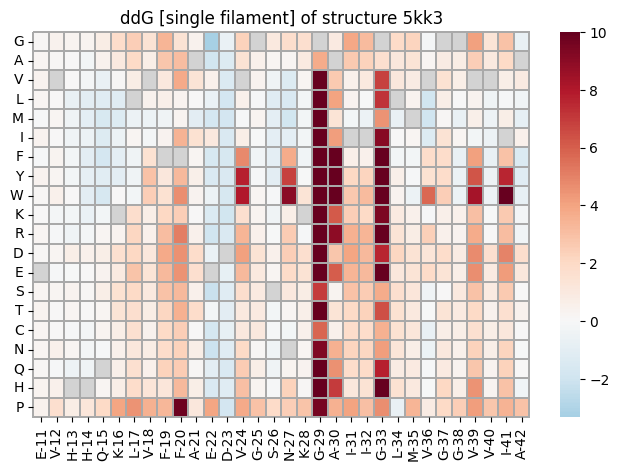

In [66]:
run = '5kk3'
fig = plt.figure(figsize=(8, 5))
sns.heatmap(dfs_to_plot[run], cmap=cmaps_ddG[run], 
            #vmin = np.quantile(values[run], 0.05),
            vmax = 10,
            mask=masks_ddG[run],
            linewidths=0.1, linecolor='darkgrey', clip_on=False,
            center=0
           )
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('ddG [single filament] of structure ' + run)

plt.savefig('./figures/20240507_ddG_predictions_single_filament_structure_' + run + '.pdf',
           bbox_inches = 'tight')

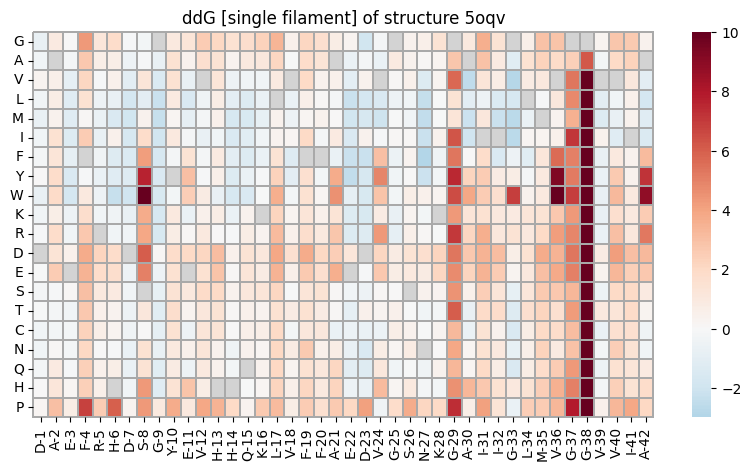

In [67]:
run = '5oqv'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(dfs_to_plot[run], cmap=cmaps_ddG[run], 
            #vmin = np.quantile(values[run], 0.05),
            vmax = 10,
            mask=masks_ddG[run],
            linewidths=0.1, linecolor='darkgrey', clip_on=False,
            center=0
           )
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('ddG [single filament] of structure ' + run)

plt.savefig('./figures/20240507_ddG_predictions_single_filament_structure_' + run + '.pdf',
           bbox_inches = 'tight')

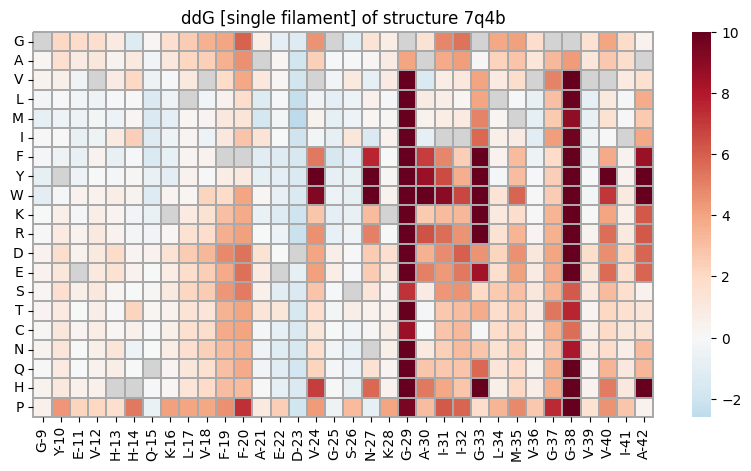

In [68]:
run = '7q4b'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(dfs_to_plot[run], cmap=cmaps_ddG[run], 
            #vmin = np.quantile(values[run], 0.05),
            vmax = 10,
            mask=masks_ddG[run],
            linewidths=0.1, linecolor='darkgrey', clip_on=False,
            center=0
           )
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('ddG [single filament] of structure ' + run)

plt.savefig('./figures/20240507_ddG_predictions_single_filament_structure_' + run + '.pdf',
           bbox_inches = 'tight')

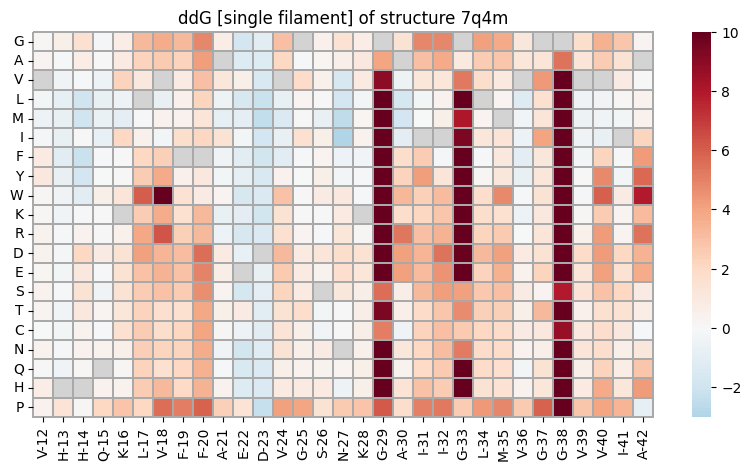

In [69]:
run = '7q4m'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(dfs_to_plot[run], cmap=cmaps_ddG[run], 
            #vmin = np.quantile(values[run], 0.05),
            vmax = 10,
            mask=masks_ddG[run],
            linewidths=0.1, linecolor='darkgrey', clip_on=False,
            center=0
           )
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('ddG [single filament] of structure ' + run)

plt.savefig('./figures/20240507_ddG_predictions_single_filament_structure_' + run + '.pdf',
           bbox_inches = 'tight')

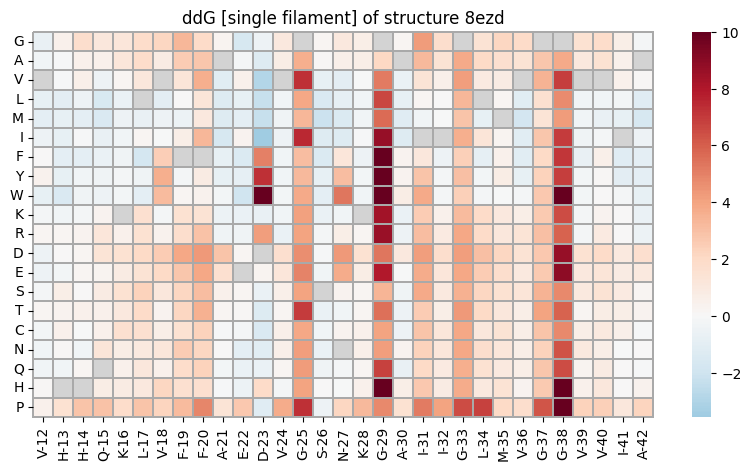

In [70]:
run = '8ezd'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(dfs_to_plot[run], cmap=cmaps_ddG[run], 
            #vmin = np.quantile(values[run], 0.05),
            vmax = 10,
            mask=masks_ddG[run],
            linewidths=0.1, linecolor='darkgrey', clip_on=False,
            center=0
           )
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('ddG [single filament] of structure ' + run)

plt.savefig('./figures/20240507_ddG_predictions_single_filament_structure_' + run + '.pdf',
           bbox_inches = 'tight')

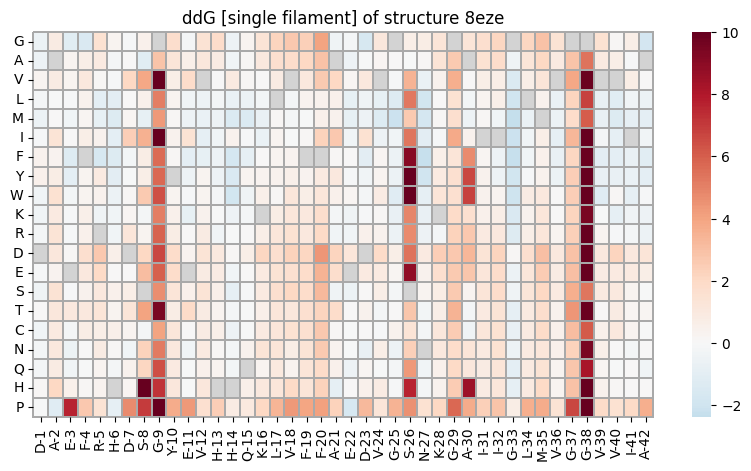

In [71]:
run = '8eze'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(dfs_to_plot[run], cmap=cmaps_ddG[run], 
            #vmin = np.quantile(values[run], 0.05),
            vmax = 10,
            mask=masks_ddG[run],
            linewidths=0.1, linecolor='darkgrey', clip_on=False,
            center=0
           )
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('ddG [single filament] of structure ' + run)

plt.savefig('./figures/20240507_ddG_predictions_single_filament_structure_' + run + '.pdf',
           bbox_inches = 'tight')

## Average ddG per position for all the structures

In [44]:
x_order = [elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))]
#x_order

In [45]:
mean_ddG_df = pd.DataFrame(index=foldX_runs, columns=x_order)

In [46]:
# exclude those ddG that we eventually exclude from phi analysis
# only selecting: 0.6 < abs(ddG) < 10

difs_selected = {}

for run in foldX_runs:
    difs_selected[run] = difs[run][abs(difs[run]['ddG_per_monomer']) < 10]
    difs_selected[run] = difs_selected[run][abs(difs_selected[run]['ddG_per_monomer']) > 0.6]
    

In [47]:
dfs_to_plot_selected = {}

for run in foldX_runs:
    dfs_to_plot_selected[run] = pd.DataFrame(index = all_aa, columns = Ab_positions[run])
    
    for new_aa in list(dfs_to_plot_selected[run].index):
        #print(new_aa)
        for mutated_pos in list(dfs_to_plot_selected[run].columns):
            #print(mutated_pos)
            curr_dif_subset = difs_selected[run][(difs_selected[run]['mutated_pos'] == mutated_pos) & (difs_selected[run]['new_aa'] == new_aa)]
            
            #print(curr_dif_subset['total energy'])
            if len(curr_dif_subset) > 0:
                dfs_to_plot_selected[run].loc[new_aa,mutated_pos] = float(list(curr_dif_subset['ddG_per_monomer'])[0])
            #else:
                #dfs_to_plot[run].loc[new_aa,mutated_pos] = np.nan
                
    dfs_to_plot_selected[run] = dfs_to_plot_selected[run].astype(float)

In [48]:
for structure in foldX_runs:
    
    for position in list(dfs_to_plot_selected[structure].columns):
        curr_mean = np.mean(dfs_to_plot_selected[structure][position])
        
        mean_ddG_df.loc[structure, position] = curr_mean

In [49]:
mean_ddG_df

,D-1,A-2,E-3,F-4,R-5,H-6,D-7,S-8,G-9,Y-10,E-11,V-12,H-13,H-14,Q-15,K-16,L-17,V-18,F-19,F-20,A-21,E-22,D-23,V-24,G-25,S-26,N-27,K-28,G-29,A-30,I-31,I-32,G-33,L-34,M-35,V-36,G-37,G-38,V-39,V-40,I-41,A-42
2beg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861965,0.887637,2.168669,1.597982,0.182065,-0.895415,-1.451956,-0.10622,3.461742,-1.066153,-0.536437,1.033446,4.929878,1.763592,1.157056,2.338069,-1.267524,1.892947,1.399219,1.300534,-1.092623,3.643957,1.372616,0.431851,1.481005,0.250779
2mxu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.61513,1.027817,-0.533438,-0.247788,-0.002716,0.928809,2.631355,1.541752,4.020211,2.727643,-0.13449,-0.834453,-0.797399,3.061596,1.580936,-0.046318,1.68575,1.232003,1.298781,2.926991,1.952126,2.885203,7.012377,1.297417,2.763878,1.17344,6.489412,0.992327,1.270059,0.448784,2.834353,-0.411015
2nao,-0.827372,-0.00725,-0.668438,1.42874,0.986183,0.544181,-0.265489,1.183275,1.187719,0.900109,-0.444977,1.003528,0.957666,-0.694362,0.57755,1.080904,1.952358,0.161106,1.763279,1.214656,-0.327657,0.371815,-1.180388,2.294182,2.069367,-0.668155,1.387648,1.313495,6.100567,4.028026,1.235777,2.916133,5.063771,1.679941,1.472262,1.841174,0.840077,2.927056,1.840863,1.115275,2.133063,-0.08687
5kk3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.688005,0.253578,-0.626172,-0.466358,0.703155,1.849273,1.502961,2.24277,3.712413,1.087514,-1.143388,-1.37324,3.083583,1.272084,-0.307903,1.935865,1.395477,7.557758,4.073868,2.706462,2.428223,5.879401,1.082051,1.341945,0.872819,1.464636,0.562749,3.852593,1.022519,2.815639,0.193811
5oqv,-0.717202,1.526983,-0.999978,2.803202,0.79515,0.564157,-1.29606,3.244051,-1.257944,1.429577,0.938045,1.456995,1.524059,-0.584278,0.028994,0.796161,2.46341,0.221369,1.886837,1.359066,1.891552,-0.99263,-1.040706,1.65983,0.483343,1.313684,-0.958106,1.945959,4.799426,0.689485,2.452012,0.897522,-0.319843,0.970339,2.08549,3.215245,4.791624,6.23215,-0.447864,2.02518,1.86557,2.228221
7q4b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.906425,1.445395,0.715938,1.056303,0.986323,1.581943,-1.089571,0.797848,1.823509,2.125404,3.066902,3.957515,0.166114,-0.546521,-1.765701,3.830687,-0.617043,-0.056487,2.30174,1.294709,7.301325,3.074916,3.898516,3.814317,4.315896,1.796736,3.024291,0.697814,3.660482,7.500906,0.816217,3.643193,1.452375,4.130991
7q4m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.889204,-0.309723,-0.110181,0.155043,1.368857,2.798135,2.992774,2.34566,3.459945,0.720453,-0.988935,-1.530633,1.436839,1.517375,0.779403,0.270988,1.100608,6.528192,1.579152,2.905749,3.220487,5.278863,2.361044,2.500151,0.397293,2.08061,7.327683,1.517139,3.050265,1.633833,3.189541
8ezd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.804723,-0.456704,0.648789,0.466588,1.075513,1.171251,1.790463,2.183588,2.630336,-0.130577,-0.712044,-0.066177,1.201689,4.637618,-1.082043,1.351848,1.260968,5.837161,-0.130336,3.031872,1.348162,3.687156,1.755917,1.420862,0.462172,2.849377,6.188158,1.056085,1.106555,0.234534,-0.146766
8eze,NaN,0.99374,1.079605,0.90047,0.765701,-0.672137,2.080674,2.321147,5.677159,1.402845,1.194973,0.715832,1.257945,-0.780827,-0.112468,0.93572,1.486665,1.772414,1.695227,2.634727,1.649878,-0.535013,0.477164,0.609059,-0.248407,4.581772,-0.721198,1.339878,2.53449,3.713357,1.213732,1.526419,-1.385108,1.152068,1.892129,0.475695,3.032741,7.865434,0.282062,0.182883,0.25443,0.118038


In [50]:
for pos in list(mean_ddG_df.columns):
    mean_ddG_df[pos] = mean_ddG_df[pos].astype(float)

In [51]:
cmap_ddG_mean = matplotlib.colormaps.get('RdBu_r')
cmap_ddG_mean.set_bad("lightgrey")

mask_ddG_mean = mean_ddG_df.isnull()

Text(0.5, 1.0, 'mean ddG [single filament]')

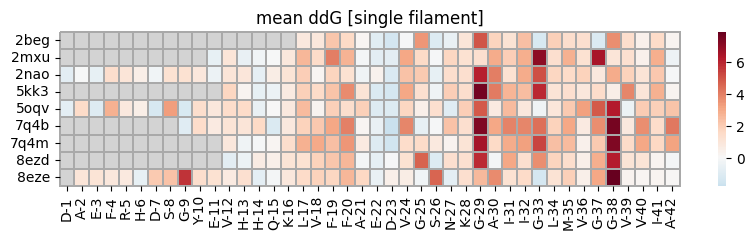

In [52]:
fig = plt.figure(figsize=(10, 2))
sns.heatmap(mean_ddG_df, cmap=cmap_ddG_mean, 
            #vmin = np.quantile(values[run], 0.05),
            #vmax = 5,
            mask=mask_ddG_mean,
            linewidths=0.1, linecolor='darkgrey', clip_on=False,
            center=0
           )
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('mean ddG [single filament]')

#plt.savefig('./figures/20240618_Fig3_mean_ddG_all_structures_selected_ddGs_only_full_range.pdf', bbox_inches='tight', 
#            transparent=True)


Text(0.5, 1.0, 'mean ddG [single filament]')

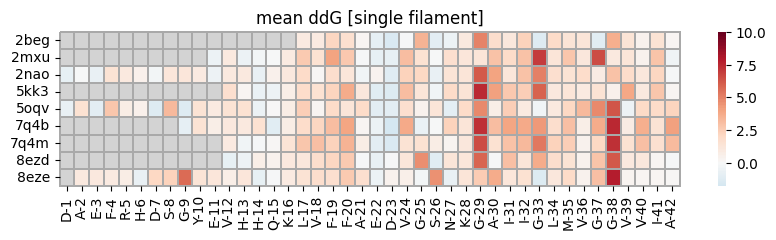

In [54]:
fig = plt.figure(figsize=(10, 2))
sns.heatmap(mean_ddG_df, cmap=cmap_ddG_mean, 
            #vmin = np.quantile(values[run], 0.05),
            vmax = 10,
            mask=mask_ddG_mean,
            linewidths=0.1, linecolor='darkgrey', clip_on=False,
            center=0
           )
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('mean ddG [single filament]')

#plt.savefig('./figures/20240618_Fig3_mean_ddG_all_structures_cap_10.pdf', bbox_inches='tight', 
#            transparent=True)


## Statistical test for APR2 vs APR1 ddG values

In [55]:
def assign_APR_region_ddG(mut_id):
    
    mut_id_int = int(mut_id[1:-1])
    
    if mut_id_int in [17,18,19,20,21]:
        result = 'APR1'
    elif mut_id_int in [29,30,31,32,33,34,35,36,37,38,39,40,41,42]:
        result = 'APR2'
    else:
        result = 'NA'
        
    return(result)

In [56]:
for structure in foldX_runs:
    difs[structure]['APR_region'] = difs[structure]['mutation'].apply(lambda x: assign_APR_region_ddG(x))
    difs[structure]['structure'] = [structure for i in range(len(difs[structure]))]

In [57]:
difs_altogether = pd.concat(difs.values(), axis=0)

In [58]:
difs_altogether['APR_region'].value_counts()

APR_region
NA      2679
APR2    2394
APR1     855
Name: count, dtype: int64

In [59]:
difs_altogether_for_violinplots = difs_altogether[difs_altogether['APR_region'] != 'NA']
    

In [60]:
for run in foldX_runs:
    print(run)

    ddG_APR1_single = list(difs_altogether_for_violinplots[(difs_altogether_for_violinplots['APR_region'] == 'APR1') & (difs_altogether_for_violinplots['structure'] == run)]['ddG_per_monomer'])
    ddG_APR2_single = list(difs_altogether_for_violinplots[(difs_altogether_for_violinplots['APR_region'] == 'APR2') & (difs_altogether_for_violinplots['structure'] == run)]['ddG_per_monomer'])
 
    print(scipy.stats.mannwhitneyu(ddG_APR2_single, ddG_APR1_single, alternative='two-sided'))

2beg
MannwhitneyuResult(statistic=12663.0, pvalue=0.9748733453896341)
2mxu
MannwhitneyuResult(statistic=12742.0, pvalue=0.9029160375813062)
2nao
MannwhitneyuResult(statistic=17622.0, pvalue=1.1216349081731364e-08)
5kk3
MannwhitneyuResult(statistic=13405.5, pvalue=0.377825256432342)
5oqv
MannwhitneyuResult(statistic=15025.0, pvalue=0.006204274292825028)
7q4b
MannwhitneyuResult(statistic=16081.0, pvalue=7.938058301129696e-05)
7q4m
MannwhitneyuResult(statistic=13769.0, pvalue=0.19420461481123996)
8ezd
MannwhitneyuResult(statistic=13717.0, pvalue=0.21546284988742248)
8eze
MannwhitneyuResult(statistic=10668.0, pvalue=0.024302851599864908)


In [61]:
for run in foldX_runs:
    print(run)

    ddG_APR1_single = list(difs_altogether_for_violinplots[(difs_altogether_for_violinplots['APR_region'] == 'APR1') & (difs_altogether_for_violinplots['structure'] == run)]['ddG_per_monomer'])
    ddG_APR2_single = list(difs_altogether_for_violinplots[(difs_altogether_for_violinplots['APR_region'] == 'APR2') & (difs_altogether_for_violinplots['structure'] == run)]['ddG_per_monomer'])
 
    print(scipy.stats.mannwhitneyu(ddG_APR2_single, ddG_APR1_single, alternative='greater'))

2beg
MannwhitneyuResult(statistic=12663.0, pvalue=0.48743667269481705)
2mxu
MannwhitneyuResult(statistic=12742.0, pvalue=0.4514580187906531)
2nao
MannwhitneyuResult(statistic=17622.0, pvalue=5.608174540865682e-09)
5kk3
MannwhitneyuResult(statistic=13405.5, pvalue=0.188912628216171)
5oqv
MannwhitneyuResult(statistic=15025.0, pvalue=0.003102137146412514)
7q4b
MannwhitneyuResult(statistic=16081.0, pvalue=3.969029150564848e-05)
7q4m
MannwhitneyuResult(statistic=13769.0, pvalue=0.09710230740561998)
8ezd
MannwhitneyuResult(statistic=13717.0, pvalue=0.10773142494371124)
8eze
MannwhitneyuResult(statistic=10668.0, pvalue=0.9878846918808861)


In [67]:
structure2id = {}

structure2id['8eze'] = 1
structure2id['5oqv'] = 2
structure2id['2beg'] = 3
structure2id['7q4m'] = 4
structure2id['7q4b'] = 5
structure2id['8ezd'] = 6
structure2id['2nao'] = 7
structure2id['2mxu'] = 8
structure2id['5kk3'] = 9


difs_altogether_for_violinplots['structure_ordered'] = [str(structure2id[structure]) + '_' + structure  for structure in difs_altogether_for_violinplots['structure']]


/tmp/ipykernel_197943/2748207891.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difs_altogether_for_violinplots['structure_ordered'] = [str(structure2id[structure]) + '_' + structure  for structure in difs_altogether_for_violinplots['structure']]


In [68]:
difs_altogether_for_violinplots = difs_altogether_for_violinplots.sort_values('structure_ordered')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '1_8eze'),
  Text(1, 0, '2_5oqv'),
  Text(2, 0, '3_2beg'),
  Text(3, 0, '4_7q4m'),
  Text(4, 0, '5_7q4b'),
  Text(5, 0, '6_8ezd'),
  Text(6, 0, '7_2nao'),
  Text(7, 0, '8_2mxu'),
  Text(8, 0, '9_5kk3')])

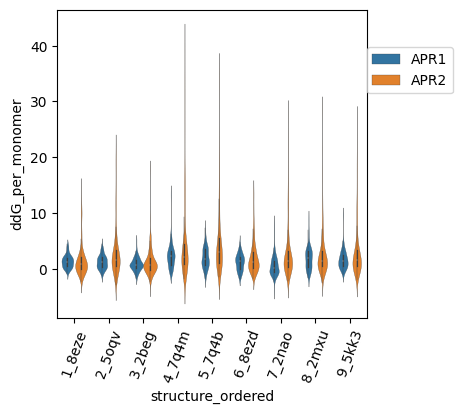

In [69]:
fig = plt.figure(figsize=(4, 4))

ax = plt.subplot(111)

sns.violinplot(data=difs_altogether_for_violinplots, x = 'structure_ordered', y = 'ddG_per_monomer', 
               #order = ['8eze','5oqv','2beg','7q4m', '7q4b', '8ezd','2nao','2mxu','5kk3'],
               hue = 'APR_region',
            hue_order=['APR1','APR2'],
               
            #flierprops={"marker": "."},
            linewidth=0.2
            
                #order = ['N','C']
                  )

ax.legend(bbox_to_anchor=(1.3, 0.9))

#plt.ylim(-1.2, 1.5)

plt.xticks(rotation=70)


#plt.savefig('./figures/20240618_ddG_single_filament_all_structures_APR_regions_violin_plot.pdf',
#           bbox_inches = 'tight')

# Calculate ddEa/ddG ratio values (R)

They are referred to as `phi_values` in this code, although they are not phi values

In [70]:
weights_Nucleation.columns

Index(['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol', 'ddEa', 'ddEa_scaled'],
      dtype='object')

In [73]:
common_mutations = {}

ddEa_mochi_common_vars = {}
ddG_FoldX_common_vars_capped = {} # capped at value supplied below
ddG_VDW_clashes = {}
FoldX_cap = 10 # 100+ is not capped basically

for run in foldX_runs:
    print(run)
    
    common_mutations[run] = {}
    ddEa_mochi_common_vars[run] = {}
    ddG_FoldX_common_vars_capped[run] = {}
    ddG_VDW_clashes[run] = {}

    curr_weights_subset = weights_Nucleation.copy()

    common_mutations[run][group] = list(set(curr_weights_subset['id']) & set(difs[run]['mutation']))
    print(len(common_mutations[run][group]), 'common mutations b/w doubles datasets subset (mutation group: ' + group + ') and FoldX ones for ' + run + ' \n')

    ddEa_mochi_common_vars[run][group] = [elem for elem in list(weights_Nucleation.set_index('id', inplace=False).loc[common_mutations[run][group], 'ddEa_scaled'])]
    # this is for 4 monomers together as a stack
    ddG_FoldX_common_vars_capped[run][group] = list(difs[run].set_index('mutation', inplace=False).loc[common_mutations[run][group], 'ddG_per_monomer'])
    ddG_FoldX_common_vars_capped[run][group] = [elem if elem < FoldX_cap else FoldX_cap for elem in ddG_FoldX_common_vars_capped[run][group]]
        
    ddG_VDW_clashes[run][group] = list(difs[run].set_index('mutation', inplace=False).loc[common_mutations[run][group], 'Van der Waals clashes'])

    # translating to ddG per monomer (ddG above is already per monomer)
    ddG_VDW_clashes[run][group] = [elem/4 for elem in ddG_VDW_clashes[run][group]]

2beg
494 common mutations b/w doubles datasets subset (mutation group: all) and FoldX ones for 2beg 

2mxu
608 common mutations b/w doubles datasets subset (mutation group: all) and FoldX ones for 2mxu 

2nao
798 common mutations b/w doubles datasets subset (mutation group: all) and FoldX ones for 2nao 

5kk3
608 common mutations b/w doubles datasets subset (mutation group: all) and FoldX ones for 5kk3 

5oqv
798 common mutations b/w doubles datasets subset (mutation group: all) and FoldX ones for 5oqv 

7q4b
646 common mutations b/w doubles datasets subset (mutation group: all) and FoldX ones for 7q4b 

7q4m
589 common mutations b/w doubles datasets subset (mutation group: all) and FoldX ones for 7q4m 

8ezd
589 common mutations b/w doubles datasets subset (mutation group: all) and FoldX ones for 8ezd 

8eze
798 common mutations b/w doubles datasets subset (mutation group: all) and FoldX ones for 8eze 



In [74]:
weights_Nucleation.columns

Index(['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol', 'ddEa', 'ddEa_scaled'],
      dtype='object')

In [76]:
# without any ddG capping

phi_values = {}

# also classify each mutation into having a phi value base on any possible sign combination
# so +/+, -/-, +/- and -/+

for run in foldX_runs:
    print(run)
    
    phi_values[run] = {}
    
    for group in mutation_groups:
    
        phi_values[run][group] = pd.DataFrame(index = common_mutations[run][group], columns = ['phi_value'])
        # divide the ddG by 4 to get the per-monomer ddG
        phi_values[run][group]['phi_value'] = [ddEa / ddG for ddEa,ddG in zip(ddEa_mochi_common_vars[run][group],
                                                         ddG_FoldX_common_vars_capped[run][group])]
        
        phi_values[run][group]['ddEa'] = [ddEa for ddEa in ddEa_mochi_common_vars[run][group]]
        phi_values[run][group]['ddG'] = [ddG for ddG in ddG_FoldX_common_vars_capped[run][group]]
        phi_values[run][group]['VDW_clashes_from_FoldX'] = [ddG for ddG in ddG_VDW_clashes[run][group]]
        

        phi_values[run][group]['Ab_position'] = [idx[0] + '-' + idx[1:-1] for idx in phi_values[run][group].index]
        phi_values[run][group]['new_aa'] = [idx[-1] for idx in phi_values[run][group].index]
        
        phi_values[run][group]['ddEa_sign'] = ['+' if ddEa > 0 else '-' for ddEa in ddEa_mochi_common_vars[run][group]]
        phi_values[run][group]['ddG_sign'] = ['+' if ddG > 0 else '-' for ddG in ddG_FoldX_common_vars_capped[run][group]]
        phi_values[run][group]['ddEa_sign_ddG_sign'] = [ddEa_sign + '_' + ddG_sign for ddEa_sign,ddG_sign in zip(phi_values[run][group]['ddEa_sign'],
                                                                                                         phi_values[run][group]['ddG_sign'])]
        
        
        

2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


In [77]:
Ab_positions_all = [AB_WT[i] + '-' + str(i+1) for i in range(len(AB_WT))]

In [78]:
dfs_to_plot_phi = {}

for run in foldX_runs:
    #print(run)
    dfs_to_plot_phi[run] = {}
    
    for group in mutation_groups:
        #print(group)
        dfs_to_plot_phi[run][group] = pd.DataFrame(index = all_aa, columns = Ab_positions_all)

        for new_aa in list(dfs_to_plot_phi[run][group].index):
            #print(new_aa)
            for mutated_pos in list(dfs_to_plot_phi[run][group].columns):
                    
                #print(mutated_pos)
                curr_phi_subset = phi_values[run][group][(phi_values[run][group]['Ab_position'] == mutated_pos) & (phi_values[run][group]['new_aa'] == new_aa)]
                #print(curr_phi_subset)
                #print(curr_dif_subset['total energy'])
                if len(curr_phi_subset) > 0:
                    dfs_to_plot_phi[run][group].loc[new_aa,mutated_pos] = float(list(curr_phi_subset['phi_value'])[0])
                #else:
                    #dfs_to_plot[run].loc[new_aa,mutated_pos] = np.nan
                    

        dfs_to_plot_phi[run][group] = dfs_to_plot_phi[run][group].astype(float)

In [79]:
cmap_universal = matplotlib.colormaps.get('RdBu_r')
cmap_universal.set_bad("lightgrey")

masks_phi = {}
for run in foldX_runs:
    
    masks_phi[run] = {}
    
    for group in mutation_groups:
        masks_phi[run][group] = dfs_to_plot_phi[run][group].isnull()

## Filtering R values by: 10 kcal/mol > abs(ddG) > 0.6 kcal/mol

In [80]:
# what if we plot only those that have abs(ddG) that is between  0.6 kcal/mol

phi_values_min_max_abs_ddG = {}

min_abs_ddG = 0.6 #1.67304 # will discard anything within [-1.67304, 1.67304]
max_abs_ddG = 10

for run in foldX_runs:
    phi_values_min_max_abs_ddG[run] = {}
    
    for group in mutation_groups:
        phi_values_min_max_abs_ddG[run][group] = phi_values[run][group].copy()
        phi_values_min_max_abs_ddG[run][group] = phi_values_min_max_abs_ddG[run][group][(abs(phi_values_min_max_abs_ddG[run][group]['ddG']) > min_abs_ddG) & (abs(phi_values_min_max_abs_ddG[run][group]['ddG']) < max_abs_ddG)]
        

In [81]:
phi_values_min_max_abs_ddG2save = phi_values_min_max_abs_ddG.copy()

In [82]:
for structure in foldX_runs:
    phi_values_min_max_abs_ddG2save[structure]['all'].columns = ['ddEa_to_ddG_ratio', 
                                            'ddEa', 'ddG', 'VDW_clashes_from_FoldX', 'Ab_position',
       'new_aa', 'ddEa_sign', 'ddG_sign', 'ddEa_sign_ddG_sign']

### Plotting selected R values

In [83]:
min_ddG = 0.6 

max_ddG = 10

In [84]:
# plot only those that are b/w 0 and 1 on both structures

#dfs_to_plot_phi_bw_0_and_1 = {}

for run in foldX_runs:
    print(run)
    dfs_to_plot_phi[run]['phi_min_max_abs_ddG'] = dfs_to_plot_phi[run]['all']
    dfs_to_plot_phi[run]['phi_min_max_abs_ddG'] = dfs_to_plot_phi[run]['phi_min_max_abs_ddG'][abs(dfs_to_plot[run]) > min_ddG]
    dfs_to_plot_phi[run]['phi_min_max_abs_ddG'] = dfs_to_plot_phi[run]['phi_min_max_abs_ddG'][abs(dfs_to_plot[run]) < max_ddG]
    

2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


In [85]:
masks_phi_min_abs_ddG = {}
for run in foldX_runs:
    masks_phi_min_abs_ddG[run] = dfs_to_plot_phi[run]['phi_min_max_abs_ddG'].isnull()

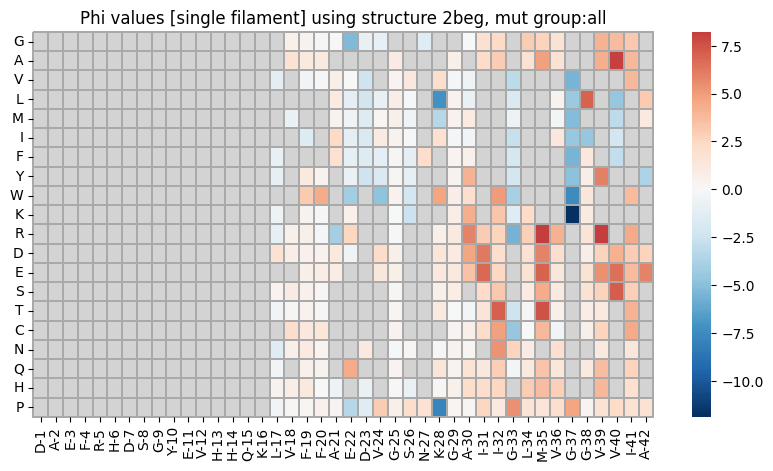

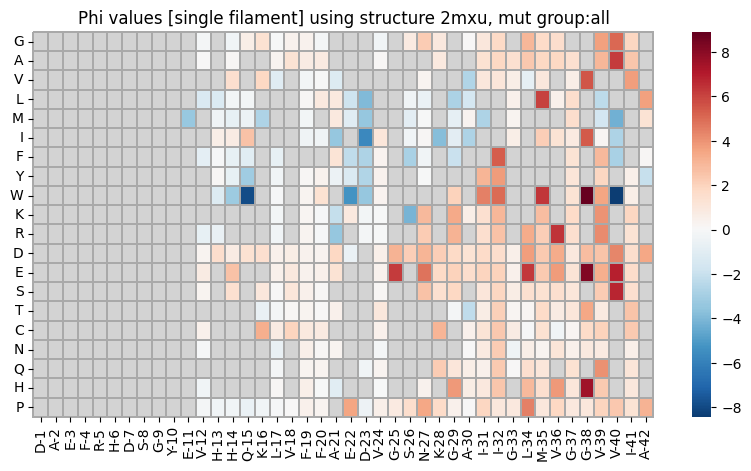

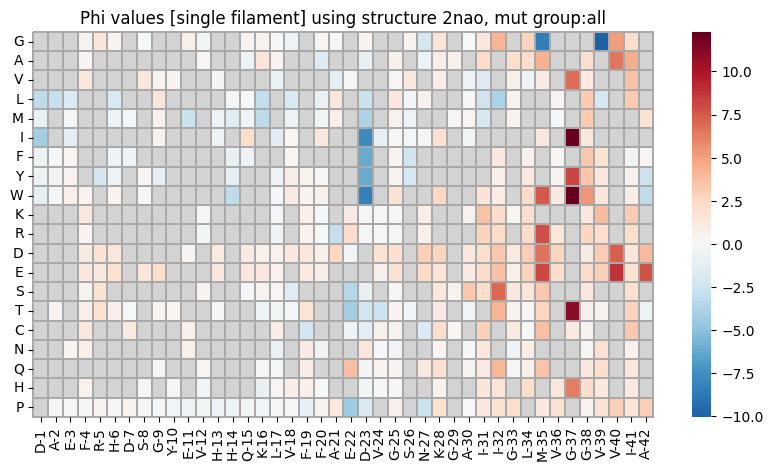

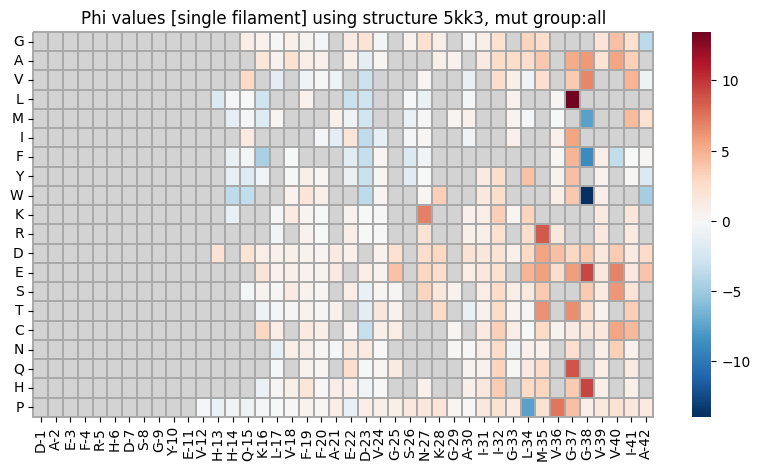

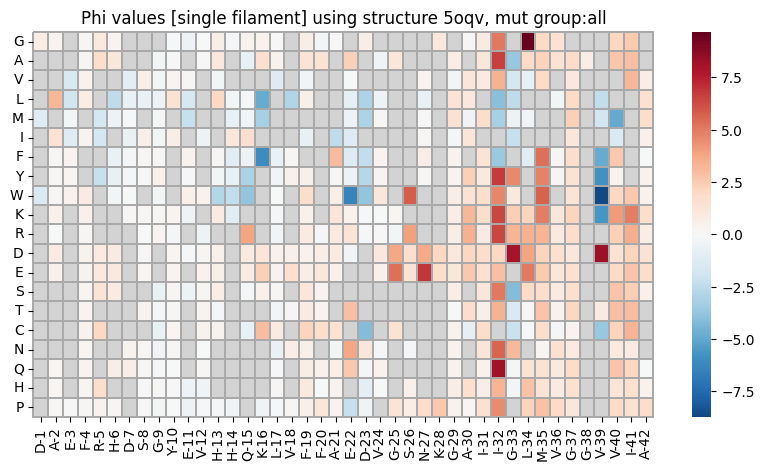

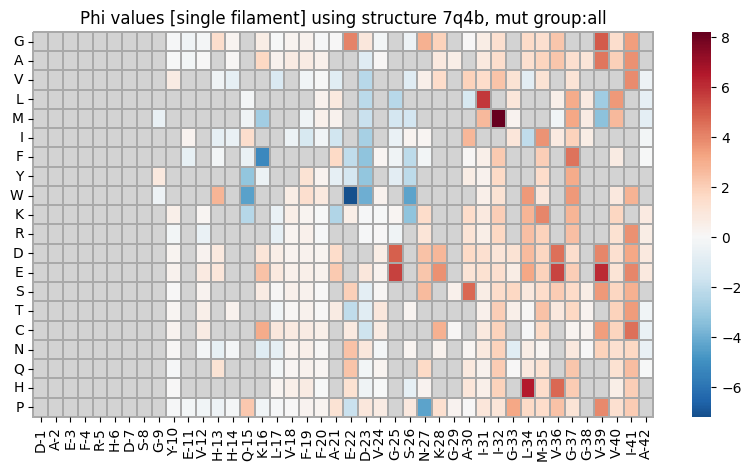

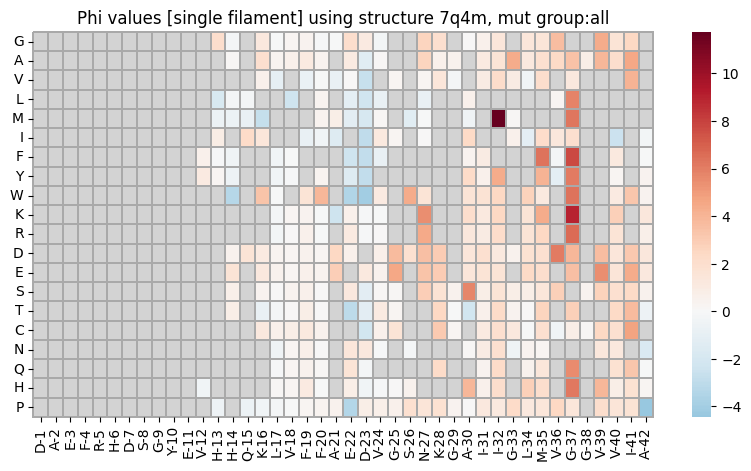

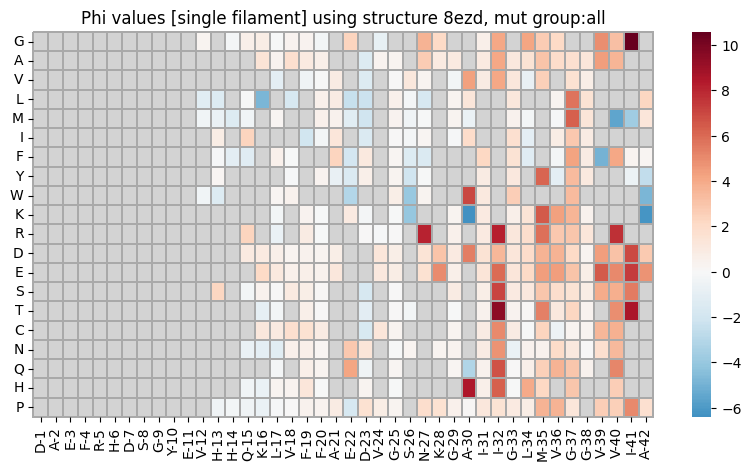

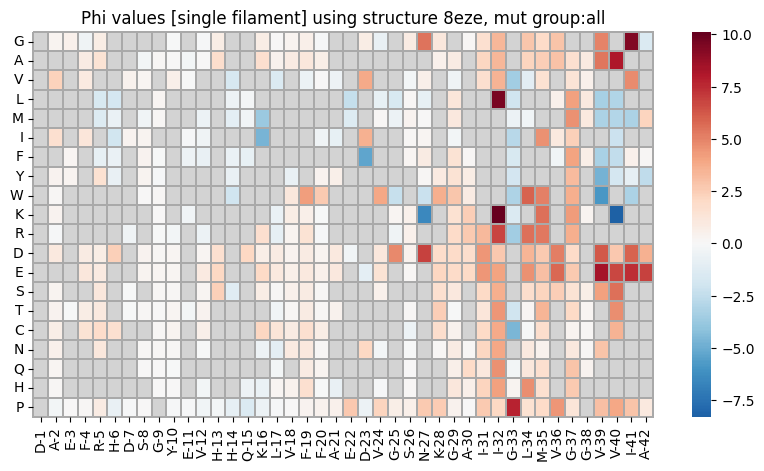

In [88]:
# with sclaed ddEa values and filteres ddG values (above 0.6 kcal/mol and below 10 kcal/mol by abs value)

for run in foldX_runs:

    group = 'all' # all mutations' phi values

    fig = plt.figure(figsize=(10, 5))

    curr_mutations = list(set(weights_Nucleation['id']) & set(phi_values[run][group].index))

    sns.heatmap(dfs_to_plot_phi[run]['phi_min_max_abs_ddG'], cmap=cmap_universal, 
                #vmin = -1, 
                #vmax = 1,    
                #vmin = np.quantile(phi_values[run][group].loc[curr_mutations, 'phi_value'], 0.05),
                    #vmax = np.quantile(phi_values[run][group].loc[curr_mutations, 'phi_value'], 0.95),
                    mask=masks_phi_min_abs_ddG[run],
                    linewidths=0.005, linecolor='darkgrey', clip_on=False,
                    center=0)
    plt.yticks(rotation=0) 
    #plt.xticks(rotation=0) 
    plt.title('Phi values [single filament] using structure ' + run + ', mut group:' + group)
    

# Average R-values per position

In [90]:
x_order = [elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))]
#x_order

In [91]:
dfs_for_violinplots_min_abs_ddG = {}

for run in foldX_runs:
    print(run)
    dfs_for_violinplots_min_abs_ddG[run] = phi_values[run]['all'][(abs(phi_values[run]['all']['ddG']) > min_ddG) & (abs(phi_values[run]['all']['ddG']) < max_ddG)]    
    print(len(dfs_for_violinplots_min_abs_ddG[run]), 'selected mutations here out of total', len(phi_values[run]['all']))
    

2beg
328 selected mutations here out of total 494
2mxu
394 selected mutations here out of total 608
2nao
444 selected mutations here out of total 798
5kk3
377 selected mutations here out of total 608
5oqv
540 selected mutations here out of total 798
7q4b
427 selected mutations here out of total 646
7q4m
387 selected mutations here out of total 589
8ezd
390 selected mutations here out of total 589
8eze
469 selected mutations here out of total 798


In [92]:
for run in foldX_runs:
    dfs_for_violinplots_min_abs_ddG[run]['structure'] = [run for i in range(0,len(dfs_for_violinplots_min_abs_ddG[run]))]
    

/tmp/ipykernel_197943/2811376007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_for_violinplots_min_abs_ddG[run]['structure'] = [run for i in range(0,len(dfs_for_violinplots_min_abs_ddG[run]))]
/tmp/ipykernel_197943/2811376007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_for_violinplots_min_abs_ddG[run]['structure'] = [run for i in range(0,len(dfs_for_violinplots_min_abs_ddG[run]))]
/tmp/ipykernel_197943/2811376007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [93]:
dfs_for_violinplots_min_abs_ddG_altogether = pd.concat(dfs_for_violinplots_min_abs_ddG.values(), axis=0)

In [136]:
# divide in N-terminus and C-terminus

def terminus(Ab_position):
    curr_pos = int(Ab_position.split('-')[1])
    
    if 0 < curr_pos < 29:
        result = 'N-terminus'
    else:
        result = 'C-terminus'

    return(result)
    

In [137]:
dfs_for_violinplots_min_abs_ddG_altogether['terminus'] = dfs_for_violinplots_min_abs_ddG_altogether['Ab_position'].apply(lambda x: terminus(x))

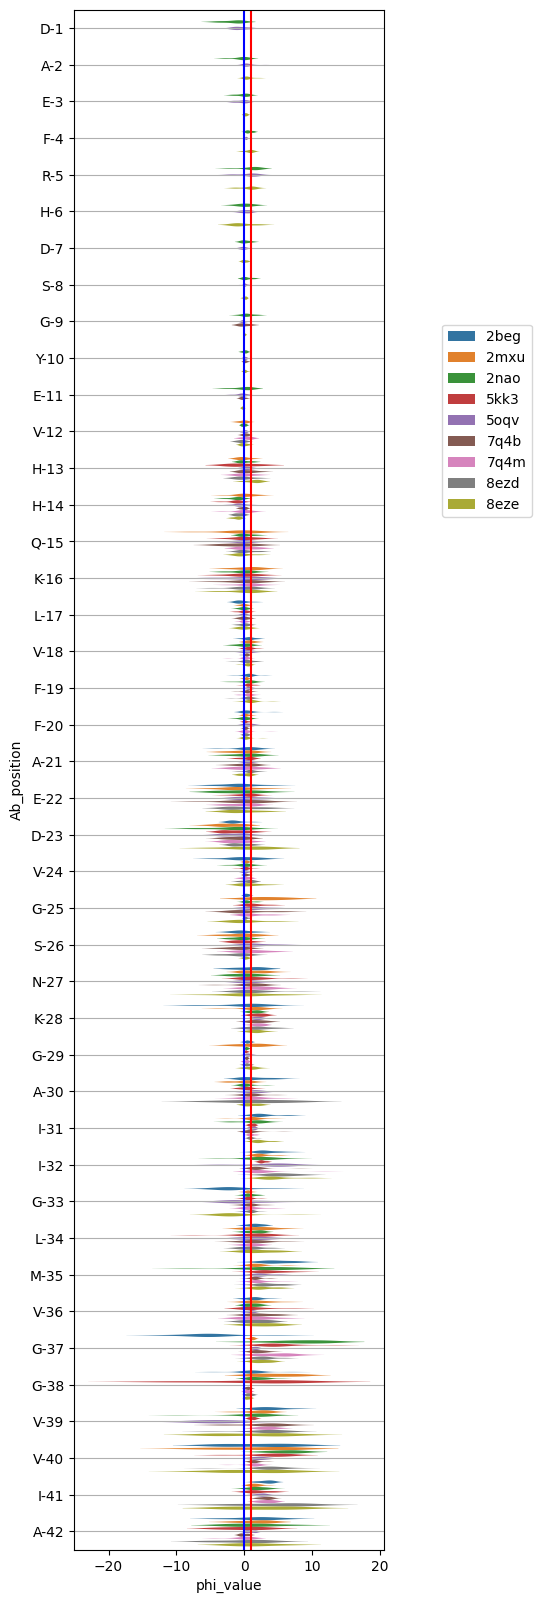

In [138]:
fig = plt.figure(figsize=(4, 20))

ax = plt.subplot(111)

sns.violinplot(data=dfs_for_violinplots_min_abs_ddG_altogether, x = 'phi_value', y = 'Ab_position', 
               hue = 'structure',
                   density_norm = 'width', # density_norm{“area”, “count”, “width”}
               linewidth=0,
                   inner=None,
                order = x_order,
               #gridsize=100
                  )

plt.grid(axis='y')

ax.legend(bbox_to_anchor=(1.5, 0.8))

plt.axvline(0, c='blue')
plt.axvline(1, c='red')

#plt.savefig('./figures/20240425_phi_values_min_abs_ddG_all_structure.pdf',
#           bbox_inches = 'tight')

In [139]:
dfs_for_violinplots_min_abs_ddG_altogether.reset_index(inplace=True)

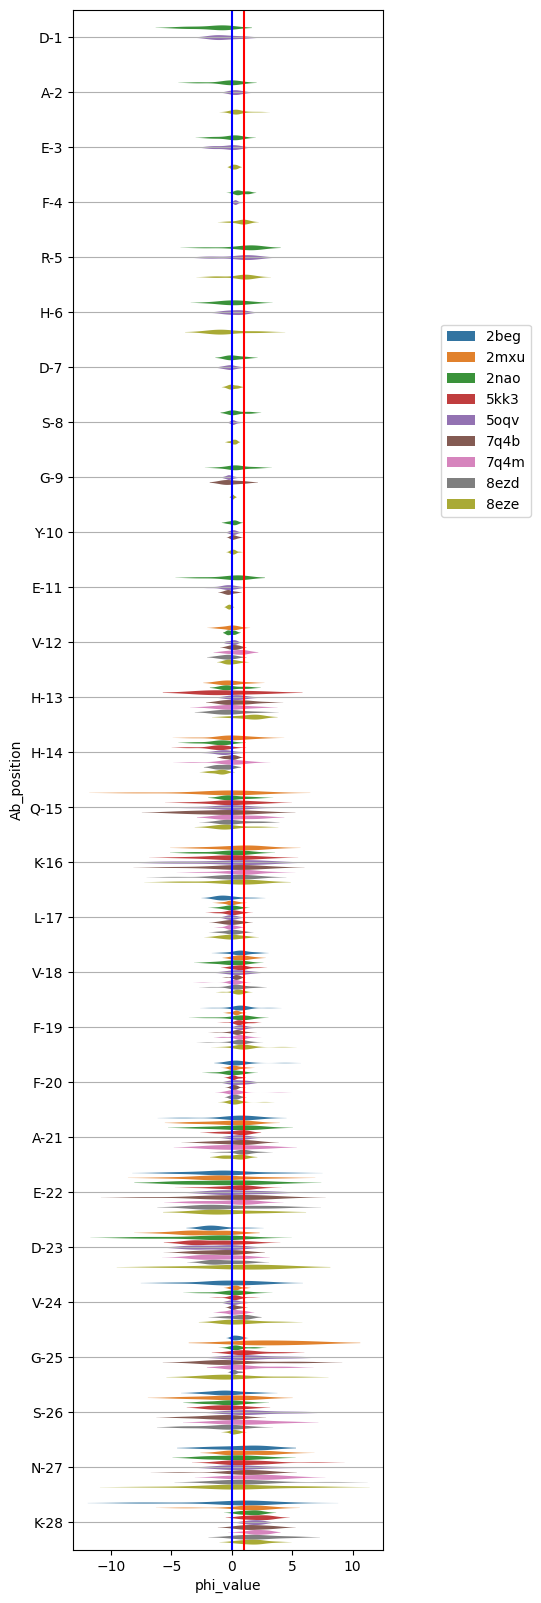

In [140]:
fig = plt.figure(figsize=(4, 20))

ax = plt.subplot(111)

sns.violinplot(data=dfs_for_violinplots_min_abs_ddG_altogether[dfs_for_violinplots_min_abs_ddG_altogether['terminus'] == 'N-terminus'], 
               x = 'phi_value', y = 'Ab_position', 
               hue = 'structure',
                   density_norm = 'width', # density_norm{“area”, “count”, “width”}
               linewidth=0,
                   inner=None,
                order = x_order[:28],
               #gridsize=100
                  )

plt.grid(axis='y')

ax.legend(bbox_to_anchor=(1.5, 0.8))

#plt.xlim(0,1)

plt.axvline(0, c='blue')
plt.axvline(1, c='red')

#plt.savefig('./figures/20240717_phi_values_min_abs_ddG_all_structures_violinplot_N_terminus.pdf',
#           bbox_inches = 'tight')

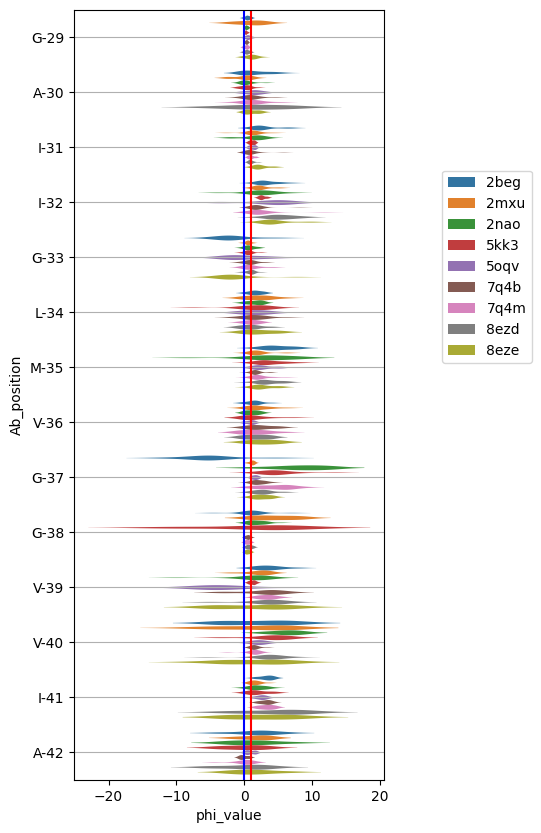

In [141]:
fig = plt.figure(figsize=(4, 10))

ax = plt.subplot(111)

sns.violinplot(data=dfs_for_violinplots_min_abs_ddG_altogether[dfs_for_violinplots_min_abs_ddG_altogether['terminus'] == 'C-terminus'], 
               x = 'phi_value', y = 'Ab_position', 
               hue = 'structure',
                   density_norm = 'width', # density_norm{“area”, “count”, “width”}
               linewidth=0,
                   inner=None,
                order = x_order[28:],
               #gridsize=100
                  )

plt.grid(axis='y')

ax.legend(bbox_to_anchor=(1.5, 0.8))

#plt.xlim(0,1)

plt.axvline(0, c='blue')
plt.axvline(1, c='red')

#plt.savefig('./figures/20240717_phi_values_min_abs_ddG_all_structures_violinplot_C_terminus.pdf',
#           bbox_inches = 'tight')

## Statistical test for APR2 vs APR1 R-values

In [96]:
def assign_APR_region(mut_id):
    
    mut_id_int = int(mut_id)
    
    if mut_id_int in [17,18,19,20,21]:
        result = 'APR1'
    elif mut_id_int in [29,30,31,32,33,34,35,36,37,38,39,40,41,42]:
        result = 'APR2'
    else:
        result = 'NA'
        
    return(result)

In [97]:
for run in foldX_runs:
    dfs_for_violinplots_min_abs_ddG[run]['position'] = [Ab_position.split('-')[1] for Ab_position in dfs_for_violinplots_min_abs_ddG[run]['Ab_position']]
    dfs_for_violinplots_min_abs_ddG[run]['APR_region'] = dfs_for_violinplots_min_abs_ddG[run]['position'].apply(lambda x: assign_APR_region(x))

/tmp/ipykernel_197943/3280938952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_for_violinplots_min_abs_ddG[run]['position'] = [Ab_position.split('-')[1] for Ab_position in dfs_for_violinplots_min_abs_ddG[run]['Ab_position']]
/tmp/ipykernel_197943/3280938952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_for_violinplots_min_abs_ddG[run]['APR_region'] = dfs_for_violinplots_min_abs_ddG[run]['position'].apply(lambda x: assign_APR_region(x))
/tmp/ipykernel_197943/3280938952.py:2: SettingWithCo

In [98]:
dfs_for_violinplots_min_abs_ddG['7q4b']['APR_region'].value_counts()

APR_region
APR2    193
NA      156
APR1     78
Name: count, dtype: int64

In [99]:
dfs_for_violinplots_min_max_abs_ddG_APR = {}
for run in foldX_runs:
    print(run)
    dfs_for_violinplots_min_max_abs_ddG_APR[run] = dfs_for_violinplots_min_abs_ddG[run][dfs_for_violinplots_min_abs_ddG[run]['APR_region'] != 'NA']
    dfs_for_violinplots_min_max_abs_ddG_APR[run]['structure'] = [run for i in range(len(dfs_for_violinplots_min_max_abs_ddG_APR[run]))]
    

2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


/tmp/ipykernel_197943/622346082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_for_violinplots_min_max_abs_ddG_APR[run]['structure'] = [run for i in range(len(dfs_for_violinplots_min_max_abs_ddG_APR[run]))]


In [100]:
dfs_for_violinplots_min_max_abs_ddG_altogether_APR = pd.concat(dfs_for_violinplots_min_max_abs_ddG_APR.values(), axis=0)

In [101]:
phi_APR1_double = list(dfs_for_violinplots_min_max_abs_ddG_altogether_APR[dfs_for_violinplots_min_max_abs_ddG_altogether_APR['APR_region'] == 'APR1']['phi_value'])
phi_APR2_double = list(dfs_for_violinplots_min_max_abs_ddG_altogether_APR[dfs_for_violinplots_min_max_abs_ddG_altogether_APR['APR_region'] == 'APR2']['phi_value'])


In [102]:
scipy.stats.mannwhitneyu(phi_APR2_double, phi_APR1_double, alternative='greater')

MannwhitneyuResult(statistic=840873.0, pvalue=1.031308841071022e-94)

In [103]:
for run in foldX_runs:
    print(run)
    dfs_for_violinplots_min_max_abs_ddG_APR[run] 
    
    phi_APR1_double = list(dfs_for_violinplots_min_max_abs_ddG_APR[run][dfs_for_violinplots_min_max_abs_ddG_APR[run]['APR_region'] == 'APR1']['phi_value'])
    phi_APR2_double = list(dfs_for_violinplots_min_max_abs_ddG_APR[run][dfs_for_violinplots_min_max_abs_ddG_APR[run]['APR_region'] == 'APR2']['phi_value'])

    print(scipy.stats.mannwhitneyu(phi_APR2_double, phi_APR1_double, alternative='greater'))

2beg
MannwhitneyuResult(statistic=8614.0, pvalue=1.8536711346933583e-07)
2mxu
MannwhitneyuResult(statistic=12170.0, pvalue=1.8523892806726667e-16)
2nao
MannwhitneyuResult(statistic=8484.0, pvalue=6.083058670258772e-13)
5kk3
MannwhitneyuResult(statistic=10101.0, pvalue=1.7127454325942314e-12)
5oqv
MannwhitneyuResult(statistic=10522.0, pvalue=3.6161056251513605e-09)
7q4b
MannwhitneyuResult(statistic=12437.0, pvalue=2.146459306429418e-17)
7q4m
MannwhitneyuResult(statistic=11443.0, pvalue=5.935570998779698e-17)
8ezd
MannwhitneyuResult(statistic=11133.0, pvalue=1.6573038334160494e-12)
8eze
MannwhitneyuResult(statistic=9037.0, pvalue=3.087701188793333e-08)


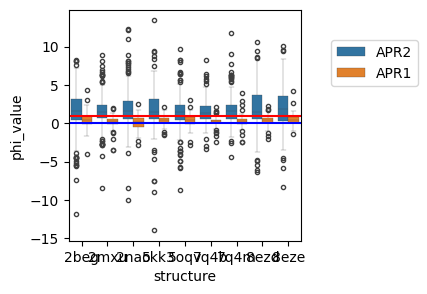

In [104]:
fig = plt.figure(figsize=(3, 3))

ax = plt.subplot(111)

sns.boxplot(data=dfs_for_violinplots_min_max_abs_ddG_altogether_APR, x = 'structure', y = 'phi_value', 
               hue = 'APR_region',
            hue_order=['APR2','APR1'],
            flierprops={"marker": "."},
            linewidth=0.2
            
                #order = ['N','C']
                  )

ax.legend(bbox_to_anchor=(1.1, 0.9))

#plt.ylim(-1.2, 1.5)

plt.axhline(0, c='blue')
plt.axhline(1, c='red')

#plt.savefig('./figures/20240717_phi_values_single_filament_min_max_abs_ddG_all_structures_APR_regions.pdf',
#           bbox_inches = 'tight')

## Plot heatmap of mean R-values per position for all structures

In [106]:
df_min_abs_ddG_means = pd.DataFrame(index = foldX_runs,
                                    columns = x_order)
df_min_abs_ddG_means

,D-1,A-2,E-3,F-4,R-5,H-6,D-7,S-8,G-9,Y-10,E-11,V-12,H-13,H-14,Q-15,K-16,L-17,V-18,F-19,F-20,A-21,E-22,D-23,V-24,G-25,S-26,N-27,K-28,G-29,A-30,I-31,I-32,G-33,L-34,M-35,V-36,G-37,G-38,V-39,V-40,I-41,A-42
2beg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2mxu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5kk3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5oqv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7q4b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7q4m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8ezd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8eze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
for structure in foldX_runs:
    print(structure)
    
    for position in df_min_abs_ddG_means.columns:
        
        df_min_abs_ddG_means.loc[structure, position] = np.mean(dfs_for_violinplots_min_abs_ddG[structure][dfs_for_violinplots_min_abs_ddG[structure]['Ab_position'] == position]['phi_value'])
    

2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


In [108]:
for position in df_min_abs_ddG_means.columns:
    df_min_abs_ddG_means[position] = df_min_abs_ddG_means[position].astype(float)

In [109]:
df_min_abs_ddG_means

,D-1,A-2,E-3,F-4,R-5,H-6,D-7,S-8,G-9,Y-10,E-11,V-12,H-13,H-14,Q-15,K-16,L-17,V-18,F-19,F-20,A-21,E-22,D-23,V-24,G-25,S-26,N-27,K-28,G-29,A-30,I-31,I-32,G-33,L-34,M-35,V-36,G-37,G-38,V-39,V-40,I-41,A-42
2beg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.442445,0.726722,0.671101,0.610681,0.374079,-0.813173,-1.420471,-0.175025,0.361770,-0.464695,0.852363,-0.192221,0.497213,1.573134,2.917419,3.394426,-1.627095,1.622029,4.828608,1.473331,-4.941412,1.130073,3.659749,1.937726,3.219209,1.823251
2mxu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.322742,-0.159178,-0.187399,0.071041,-0.988132,0.633300,-0.103929,0.809441,0.285517,0.284964,-0.376434,-0.993060,-2.312148,0.303408,3.356639,-0.521700,1.506935,1.156700,0.919999,-0.254106,1.283370,2.492552,0.509234,2.218499,2.162141,2.112829,1.113558,4.543061,2.066936,1.334576,1.609629,1.590162
2nao,-1.729455,-0.511899,-0.212118,0.738528,0.927745,0.080285,0.179925,0.409915,0.446377,0.067142,-0.137417,-0.082371,-0.011894,-1.225546,0.238888,-0.315466,-0.145785,-0.042098,0.453163,0.035362,0.257032,-0.692698,-2.438111,0.000528,0.564929,-0.527981,0.106537,1.533948,0.364658,0.374345,1.281943,2.394679,0.786001,1.532880,3.298435,1.163779,8.267467,1.939951,0.874589,6.159995,1.971206,1.304898
5kk3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.352261,-0.299896,-1.345474,-0.036085,-0.238501,-0.057671,0.672776,0.675575,0.173629,0.328788,0.258245,-1.312808,0.218802,1.441316,-0.470519,1.429301,2.081940,0.302255,0.255554,1.125085,2.654473,0.650002,1.297172,3.838167,1.667198,5.061254,1.120530,1.196303,3.770724,2.041878,-0.097069
5oqv,-0.578432,0.570086,-0.492051,0.343313,0.411716,0.000486,-0.175818,0.106407,-0.194839,0.197877,-0.481185,0.019377,0.217506,-0.666102,-0.164652,-0.568496,-0.110139,0.121604,0.730165,0.578832,0.539438,-0.017530,-1.473666,0.197969,1.842940,1.988584,1.432422,1.857556,0.556754,1.390972,1.190061,3.537090,0.214553,2.144264,2.751770,0.869957,1.505326,0.748100,-2.643804,1.539696,2.607226,0.885829
7q4b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.051566,0.143784,-0.244485,0.142287,0.488738,-0.137461,-0.918541,-0.040846,-0.063472,0.315985,0.341470,0.185670,0.213557,-0.118623,-1.087564,0.253823,0.532582,-1.162375,0.882810,1.902005,0.337695,1.081557,1.106409,2.039835,0.887403,1.558820,1.774479,2.324037,2.120310,0.532811,2.606240,1.557714,3.130642,-0.054245
7q4m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.415088,0.009930,-0.165259,0.419851,0.720536,-0.078602,0.064202,0.551048,0.345320,0.234120,-0.332297,-1.169485,0.232394,1.271906,1.177191,2.119182,2.119530,0.251140,1.288230,1.009621,2.608556,1.083710,1.072451,2.290784,1.709798,4.624622,0.487116,3.310437,1.328000,3.273984,-0.060970
8ezd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.417562,-0.117623,-0.760284,0.254673,-0.093378,0.030923,0.413242,0.469095,0.218878,0.865413,-0.154671,-0.560359,0.550601,0.254055,-1.120796,1.300479,2.156414,0.393321,1.833855,0.976155,5.455725,0.929935,0.984504,3.590699,1.801821,2.789919,0.771561,3.014044,3.395534,4.456164,-0.073643
8eze,NaN,0.525932,0.186523,0.746829,0.580167,-0.307072,0.038237,0.116782,0.064899,0.107522,-0.242602,-0.059924,1.380797,-1.083789,-0.215325,-0.032079,-0.052267,0.449621,1.072308,0.330787,0.197255,-0.340357,0.492989,0.733891,0.114089,0.185667,0.654774,1.702945,1.061319,1.121160,2.390624,4.689548,-1.370386,2.236851,2.828223,2.754855,2.578255,0.533370,1.221323,1.120501,2.644697,1.421499


In [110]:
cmap_universal = matplotlib.colormaps.get('RdBu_r')
cmap_universal.set_bad("lightgrey")

mask_means = df_min_abs_ddG_means.isnull()

In [111]:
flat_list = [
    x
    for xs in df_min_abs_ddG_means.to_numpy()
    for x in xs
]



In [112]:
flat_list = [elem for elem in flat_list if str(elem)  != 'nan']

Text(0.5, 1.0, 'Phi value mean values ')

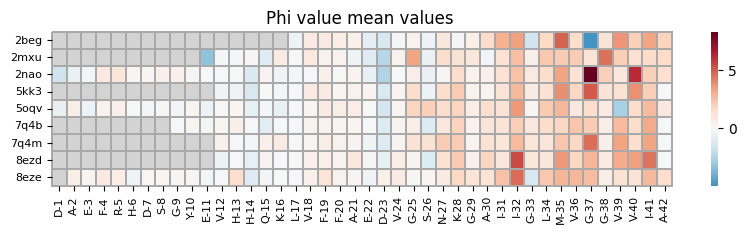

In [113]:
# new, scaled and shifted ddEa values, all ddG b/w 0.6 and 10 kcal/mol by abs
fig = plt.figure(figsize=(10, 2))

sns.heatmap(df_min_abs_ddG_means, 
            cmap=cmap_universal, 
                #vmax = 1,    
                #vmin = np.quantile(phi_values[run][group].loc[curr_mutations, 'phi_value'], 0.05),
                    #vmax = np.quantile(phi_values[run][group].loc[curr_mutations, 'phi_value'], 0.95),
                    mask=mask_means,
                    linewidths=0.1, linecolor='darkgrey', clip_on=False,
                    center=0)
plt.yticks(rotation=0, fontsize=8) 
plt.xticks(fontsize=8) 
#plt.xticks(rotation=0) 
plt.title('Phi value mean values ')

#plt.savefig('./figures/20240717_Fig3c_mean_ddEa_to_ddG_ratios_all_structures_full_range.pdf', bbox_inches='tight', 
#            transparent=True)



# Calculating root mean square distance (RMS) from 1 for all R-values

In [122]:
diff_df = df_min_abs_ddG_means.loc[:,df_min_abs_ddG_means.columns[28:]] - 1

In [123]:
diff_df

,G-29,A-30,I-31,I-32,G-33,L-34,M-35,V-36,G-37,G-38,V-39,V-40,I-41,A-42
2beg,-0.502787,0.573134,1.917419,2.394426,-2.627095,0.622029,3.828608,0.473331,-5.941412,0.130073,2.659749,0.937726,2.219209,0.823251
2mxu,-0.080001,-1.254106,0.283370,1.492552,-0.490766,1.218499,1.162141,1.112829,0.113558,3.543061,1.066936,0.334576,0.609629,0.590162
2nao,-0.635342,-0.625655,0.281943,1.394679,-0.213999,0.532880,2.298435,0.163779,7.267467,0.939951,-0.125411,5.159995,0.971206,0.304898
5kk3,-0.697745,-0.744446,0.125085,1.654473,-0.349998,0.297172,2.838167,0.667198,4.061254,0.120530,0.196303,2.770724,1.041878,-1.097069
5oqv,-0.443246,0.390972,0.190061,2.537090,-0.785447,1.144264,1.751770,-0.130043,0.505326,-0.251900,-3.643804,0.539696,1.607226,-0.114171
7q4b,-0.662305,0.081557,0.106409,1.039835,-0.112597,0.558820,0.774479,1.324037,1.120310,-0.467189,1.606240,0.557714,2.130642,-1.054245
7q4m,-0.748860,0.288230,0.009621,1.608556,0.083710,0.072451,1.290784,0.709798,3.624622,-0.512884,2.310437,0.328000,2.273984,-1.060970
8ezd,-0.606679,0.833855,-0.023845,4.455725,-0.070065,-0.015496,2.590699,0.801821,1.789919,-0.228439,2.014044,2.395534,3.456164,-1.073643
8eze,0.061319,0.121160,1.390624,3.689548,-2.370386,1.236851,1.828223,1.754855,1.578255,-0.466630,0.221323,0.120501,1.644697,0.421499


In [124]:
# for all the R values

for structure in foldX_runs:
    print(structure)
    phi_values_min_max_abs_ddG[structure]['all']['Ab_position_int'] = [int(Ab_position.split('-')[1]) for Ab_position in phi_values_min_max_abs_ddG[structure]['all']['Ab_position']]
    

2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


In [125]:
phi_values_min_max_abs_ddG_APR2 = {}

for structure in foldX_runs:
    print(structure)
    phi_values_min_max_abs_ddG_APR2[structure] = phi_values_min_max_abs_ddG[structure]['all'][phi_values_min_max_abs_ddG[structure]['all']['Ab_position_int'] > 28]
    

2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


In [132]:
std_df = pd.DataFrame(index = foldX_runs)

In [133]:
for structure in foldX_runs:
    print(structure)
    phi_values_min_max_abs_ddG_APR2[structure]['ddEa_to_ddG_ratio_minus_1'] = phi_values_min_max_abs_ddG_APR2[structure]['ddEa_to_ddG_ratio'] - 1
        
    curr_rms = np.sqrt(np.mean(np.square(phi_values_min_max_abs_ddG_APR2[structure]['ddEa_to_ddG_ratio_minus_1'])))
    print(structure, curr_rms)
    
    std_df.loc[structure, 'rms_indiv_ddEa_to_ddG_ratios'] = curr_rms
    

2beg
2beg 3.1013015699744755
2mxu
2mxu 2.247582170165313
2nao
2nao 2.9395940280417157
5kk3
5kk3 3.041498288547682
5oqv
5oqv 2.417422195591234
7q4b
7q4b 1.6793019786588192
7q4m
7q4m 2.1838625572127337
8ezd
8ezd 2.8273756144272024
8eze
8eze 3.0139987760754288


/tmp/ipykernel_197943/1788796082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phi_values_min_max_abs_ddG_APR2[structure]['ddEa_to_ddG_ratio_minus_1'] = phi_values_min_max_abs_ddG_APR2[structure]['ddEa_to_ddG_ratio'] - 1
/tmp/ipykernel_197943/1788796082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phi_values_min_max_abs_ddG_APR2[structure]['ddEa_to_ddG_ratio_minus_1'] = phi_values_min_max_abs_ddG_APR2[structure]['ddEa_to_ddG_ratio'] - 1


In [134]:
std_df

,rms_indiv_ddEa_to_ddG_ratios
2beg,3.101302
2mxu,2.247582
2nao,2.939594
5kk3,3.041498
5oqv,2.417422
7q4b,1.679302
7q4m,2.183863
8ezd,2.827376
8eze,3.013999


In [135]:
std_df.sort_values('rms_indiv_ddEa_to_ddG_ratios')

,rms_indiv_ddEa_to_ddG_ratios
7q4b,1.679302
7q4m,2.183863
2mxu,2.247582
5oqv,2.417422
8ezd,2.827376
2nao,2.939594
8eze,3.013999
5kk3,3.041498
2beg,3.101302
